In [449]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
from sklearn.model_selection import train_test_split # split dataset
from sklearn.linear_model import LogisticRegression # linear model for classification
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [345]:
data = pd.read_csv("census.csv")

In [346]:
data

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,Private,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
45218,39,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
45219,38,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
45220,44,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K


In [347]:
data.dtypes

age                  int64
workclass           object
education_level     object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income              object
dtype: object

In [348]:
data[['workclass','education_level','marital-status','occupation','relationship','race','sex','native-country','income']] = data[['workclass','education_level','marital-status','occupation','relationship','race','sex','native-country','income']].astype('category')

In [349]:
data.dtypes

age                   int64
workclass          category
education_level    category
education-num       float64
marital-status     category
occupation         category
relationship       category
race               category
sex                category
capital-gain        float64
capital-loss        float64
hours-per-week      float64
native-country     category
income             category
dtype: object

In [350]:
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [351]:
missing_data = data.isnull()

In [352]:
missing_data

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45218,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45219,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45220,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [353]:
data.isnull().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [354]:
data.dtypes

age                   int64
workclass          category
education_level    category
education-num       float64
marital-status     category
occupation         category
relationship       category
race               category
sex                category
capital-gain        float64
capital-loss        float64
hours-per-week      float64
native-country     category
income             category
dtype: object

In [355]:
data = data.rename(columns={'marital-status': 'marital_status', 'native-country': 'native_country', 'education-num' : 'education_num', 'capital-gain': 'capital_gain', 'capital-loss' :'capital_loss' , 'hours-per-week':'hours_per_week'  })

In [356]:
data.columns

Index(['age', 'workclass', 'education_level', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [357]:
dummies = pd.get_dummies(data[['workclass','education_level','marital_status','occupation','relationship','race','sex','native_country','income']])

In [358]:
dummies.shape

(45222, 100)

In [359]:
data = pd.concat([data, dummies],axis=1)

In [361]:
data.info

<bound method DataFrame.info of        age          workclass education_level  education_num  \
0       39          State-gov       Bachelors           13.0   
1       50   Self-emp-not-inc       Bachelors           13.0   
2       38            Private         HS-grad            9.0   
3       53            Private            11th            7.0   
4       28            Private       Bachelors           13.0   
...    ...                ...             ...            ...   
45217   33            Private       Bachelors           13.0   
45218   39            Private       Bachelors           13.0   
45219   38            Private       Bachelors           13.0   
45220   44            Private       Bachelors           13.0   
45221   35       Self-emp-inc       Bachelors           13.0   

            marital_status          occupation    relationship  \
0            Never-married        Adm-clerical   Not-in-family   
1       Married-civ-spouse     Exec-managerial         Husband   
2

In [363]:
data.dtypes

age                                 int64
workclass                        category
education_level                  category
education_num                     float64
marital_status                   category
                                   ...   
native_country_ United-States       uint8
native_country_ Vietnam             uint8
native_country_ Yugoslavia          uint8
income_<=50K                        uint8
income_>50K                         uint8
Length: 114, dtype: object

In [401]:
data.drop("income_>50K",axis = 1, inplace=True)

In [402]:
y = data['income_<=50K']

In [403]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: income_<=50K, dtype: uint8

In [406]:
features = list(data.columns)
features.remove('income_<=50K')
print(features)

['age', 'workclass', 'education_level', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital_status_ Divorced', 'marital_status_ Married-AF-spouse', 'marital_status_ Married-civ-spouse', 'marital_status_ Married-spouse-absent', 'marital_status_ Never-

In [413]:
data.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_<=50K
0,39,13.0,2174.0,0.0,40.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,50,13.0,0.0,0.0,13.0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,38,9.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,53,7.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,28,13.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [417]:
features = list(data.columns)
features.remove('income_<=50K')

In [418]:
X = data[features]

In [419]:
X.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,13.0,2174.0,0.0,40.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13.0,0.0,0.0,13.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [420]:
from sklearn.feature_selection import SelectKBest, chi2

In [421]:
X_new = SelectKBest(chi2, k=20).fit_transform(X,y)

In [422]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.4, random_state = 42)

In [424]:
log_reg = LogisticRegression()

In [425]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [426]:
y_pred = log_reg.predict(X_test)

In [427]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.59      0.65      4453
           1       0.87      0.93      0.90     13636

    accuracy                           0.85     18089
   macro avg       0.80      0.76      0.78     18089
weighted avg       0.84      0.85      0.84     18089



In [428]:
acc = log_reg.score(X_test, y_test)

In [429]:
acc

0.8466471336171154

In [430]:
# feature importance
log_reg.coef_

array([[-1.85712863e-02, -2.66798036e-01, -3.17367857e-04,
        -6.40263929e-04, -2.21355902e-02, -2.74583615e-01,
        -6.33672385e-02, -1.26593617e-02, -4.46590024e-01,
         2.10537386e-01, -1.37051782e+00,  8.45504439e-01,
        -7.80896180e-01,  7.42315613e-01, -4.44372281e-01,
         8.16702844e-01,  9.83492581e-01,  2.08418906e+00,
         1.38017340e+00,  5.18014500e-01]])

In [431]:
cf = confusion_matrix(y_test, y_pred)
cf

array([[ 2615,  1838],
       [  936, 12700]], dtype=int64)

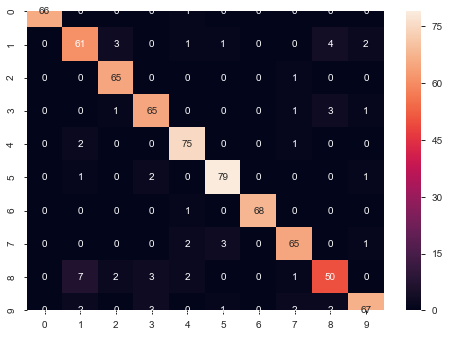

In [134]:
sns.heatmap(cf, annot = True)

In [434]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [435]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.4, random_state=123)

In [436]:
model = XGBClassifier()

In [437]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [438]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [439]:
y_pred = model.predict(X_test)

In [454]:
print(model.feature_importances_)

[0.04389941 0.12565668 0.07690284 0.03788982 0.03933948 0.00980528
 0.00404005 0.00194874 0.00326816 0.00162372 0.42018408 0.01907359
 0.06194585 0.05000664 0.03932798 0.         0.01451106 0.03387588
 0.00682143 0.00987927]


In [440]:
predictions = [round(value) for value in y_pred]

In [441]:
accuracy = accuracy_score(y_test, predictions)

In [450]:
accuracy

0.8552158770523522

In [445]:
precision = precision_score(y_test, predictions)

In [446]:
print(precision)

0.8732346780187851


In [447]:
recall = recall_score(y_test, predictions)

In [448]:
print(recall)

0.9456314942192302


In [453]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.58      0.66      4423
           1       0.87      0.95      0.91     13666

    accuracy                           0.86     18089
   macro avg       0.82      0.76      0.78     18089
weighted avg       0.85      0.86      0.85     18089

